**Task 1:**

It is crucial for you as a Data Scientist to gain the confidence of business stakeholders at the very outset of the project through some quick wins in the form of exciting findings, in-depth data understandings, and great visualizations.

As a Data Scientist, you need to dive deep into the datasets (refer to the set of the following sub-tasks) to unlock interesting insights about customers, their transactional behaviours, ParTech’s business trends, etc. Also, you need to build a clear understanding of each feature in the datasets through a quick and efficient data quality report.

In [ ]:
!pip install pandas-profiling==2.7.1 

     |████████████████████████████████| 252 kB 7.1 MB/s 
     |████████████████████████████████| 3.1 MB 97.4 MB/s 
     |████████████████████████████████| 58 kB 7.8 MB/s 
     |████████████████████████████████| 675 kB 72.4 MB/s 
     |████████████████████████████████| 812 kB 84.9 MB/s 
     |████████████████████████████████| 28.5 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d3f008fc1258a6c635edb2a3616bfeecabf9cf5730ea069e9fad45109e886c17
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=5e87a9e25bccfb617ed3762cafa8a26b1bdcfd37c807d6e0dd19c9007b834847
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [ ]:
pip install scikit-plot

In [ ]:
from google.colab import drive 
#get drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.neighbors.nearest_centroid import NearestCentroid
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from scipy import stats
from sklearn.metrics import roc_curve, auc,recall_score,precision_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
mmd_df=pd.read_csv('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/marketing_monthly_data.csv')
tdd_df=pd.read_csv('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/transaction_details_data.csv')
tmd_df=pd.read_csv('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/transaction_monthly_data.csv')

In [ ]:
total_df = pd.concat([mmd_df, tmd_df, tdd_df])
print(total_df.shape)
print(total_df.columns)

(3026707, 109)
Index(['user_id', 'yearmonth', 'city', 'country',
       'attributes_notifications_marketing_email',
       'attributes_notifications_marketing_push', 'birth_year',
       'user_created_date', 'num_contacts', 'num_referrals',
       ...
       'transactions_type_topup', 'transactions_type_card_refund',
       'transactions_type_refund', 'transactions_type_fee',
       'transactions_type_cashback', 'transactions_type_tax', 'tx_count',
       'transactions_type', 'transactions_state', 'created_date'],
      dtype='object', length=109)


***Sub-tasks - Part A - [Exploratory Data Analysis using Tableau Public]***
1. What can be inferred from the distribution of the total amount_usd transactions across different transactions_state? (Hint: Use transaction_details_data)


In [ ]:
db1=tdd_df[['amount_usd','transactions_state']]
print(db1.shape)
db1=db1.dropna()
print(db1.shape)
db1_1=db1.iloc[:1048576,:]
print(db1_1.shape)
db1_rem=db1.iloc[1048576:,:]
db1_2=db1_rem.iloc[:1048576,:]
db1_3=db1.iloc[2097152:,:]
print(db1_3)

(2740075, 2)
(2740075, 2)
(1048576, 2)
         amount_usd transactions_state
2097152       17.94           DECLINED
2097153       40.58          COMPLETED
2097154       10.85          COMPLETED
2097155       16.97          COMPLETED
2097156        4.30          COMPLETED
...             ...                ...
2740070        1.70          COMPLETED
2740071       17.02          COMPLETED
2740072        4.26          COMPLETED
2740073        1.70          COMPLETED
2740074        4.26          COMPLETED

[642923 rows x 2 columns]


In [ ]:
file_db1_1=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db1_1.xlsx')
db1_1.to_excel(file_db1_1)

In [ ]:
file_db1_2=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db1_2.xlsx')
db1_2.to_excel(file_db1_2)

In [ ]:
file_db1_3=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db1_3.xlsx')
db1_3.to_excel(file_db1_3)

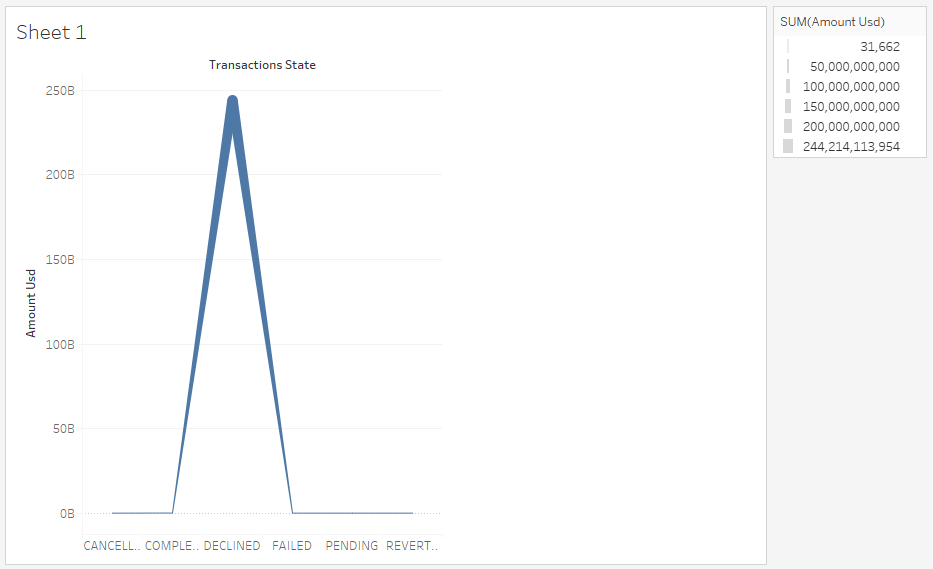

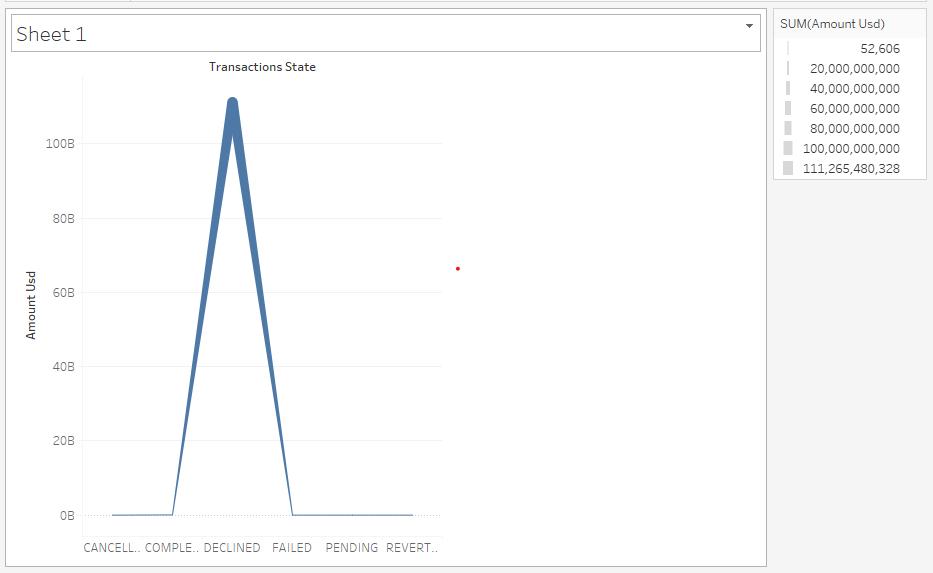

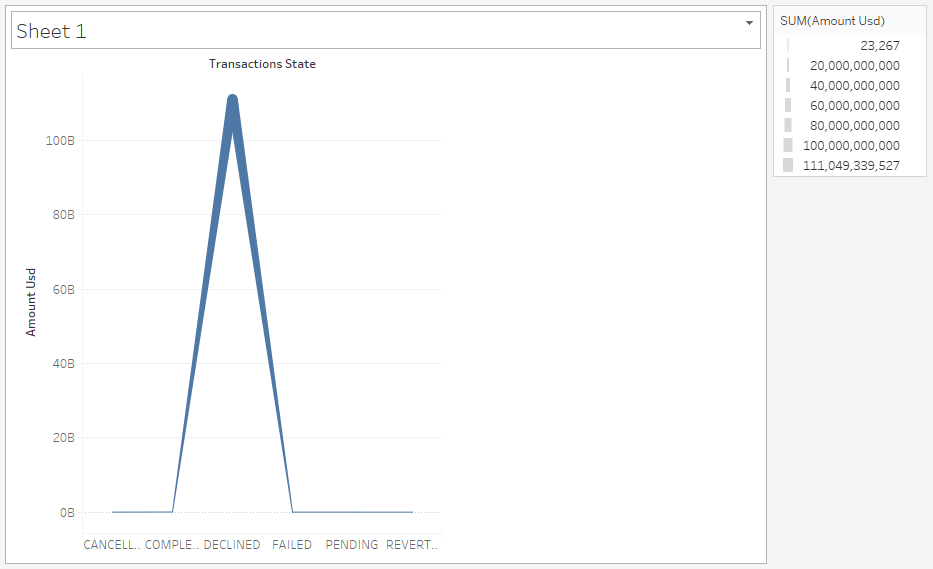

2. Which transactions_type has been most beneficial to ParTech monetarily? (Hint: Only COMPLETED transactions directly add value to ParTech)

In [ ]:
db2=tdd_df[['amount_usd','transactions_state','transactions_type']]
print(db2.shape)
db2=db2.dropna()
print(db2.shape)
db2_1=db2.iloc[:1048576,:]
print(db2_1.shape)
db2_rem=db2.iloc[1048576:,:]
db2_2=db2_rem.iloc[:1048576,:]
db2_3=db2.iloc[2097152:,:]
print(db2_3.shape)

(2740075, 3)
(2740075, 3)
(1048576, 3)
(642923, 3)


In [ ]:
file_db2_1=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db2_1.xlsx')
db2_1.to_excel(file_db2_1)

In [ ]:
file_db2_2=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db2_2.xlsx')
db2_2.to_excel(file_db2_2)

In [ ]:
file_db2_3=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db2_3.xlsx')
db2_3.to_excel(file_db2_3)

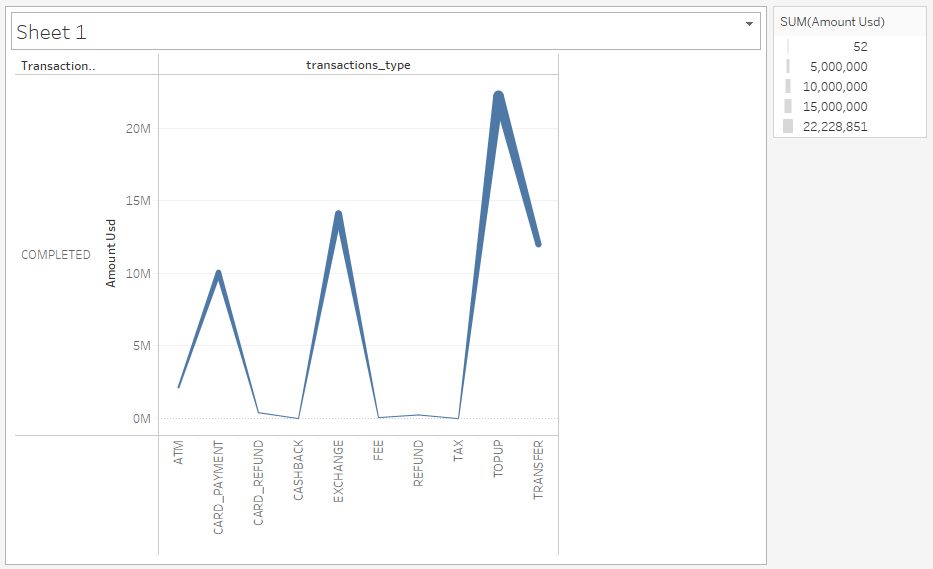

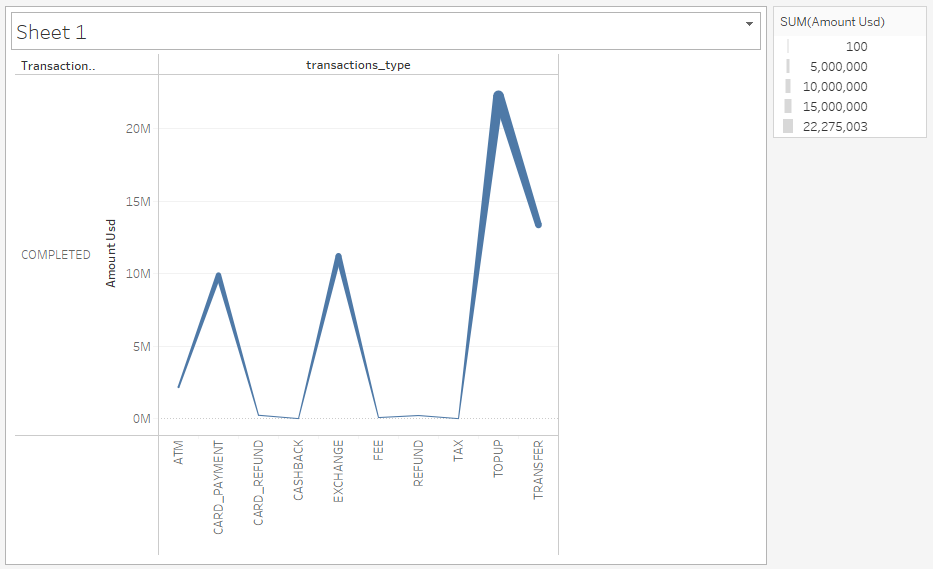

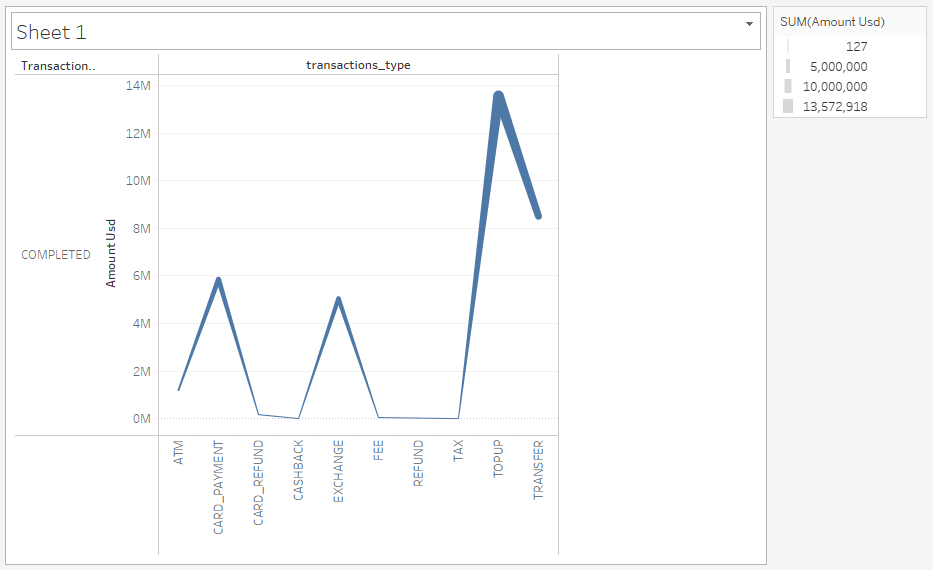



3. Which type of transactions has the highest amount_usd of non-COMPLETED
transactions?

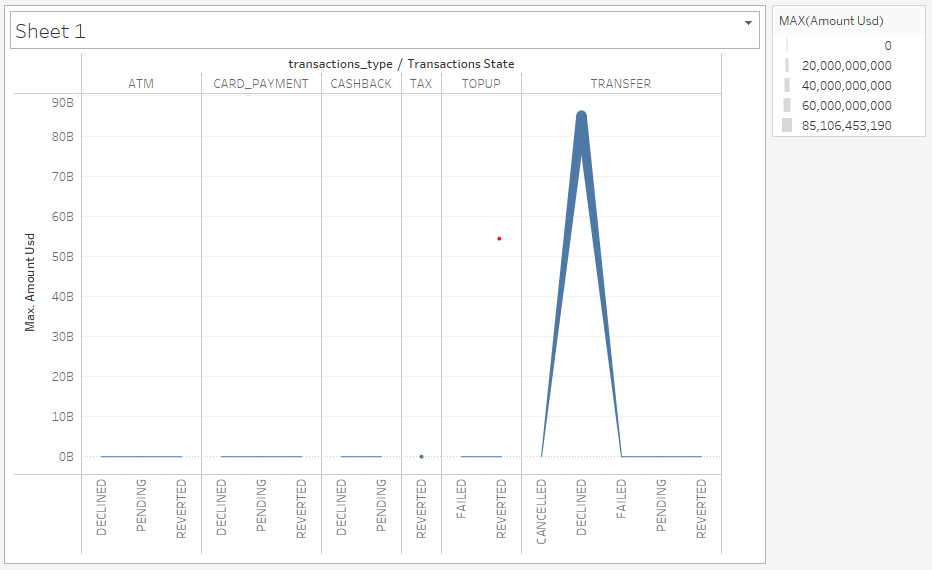

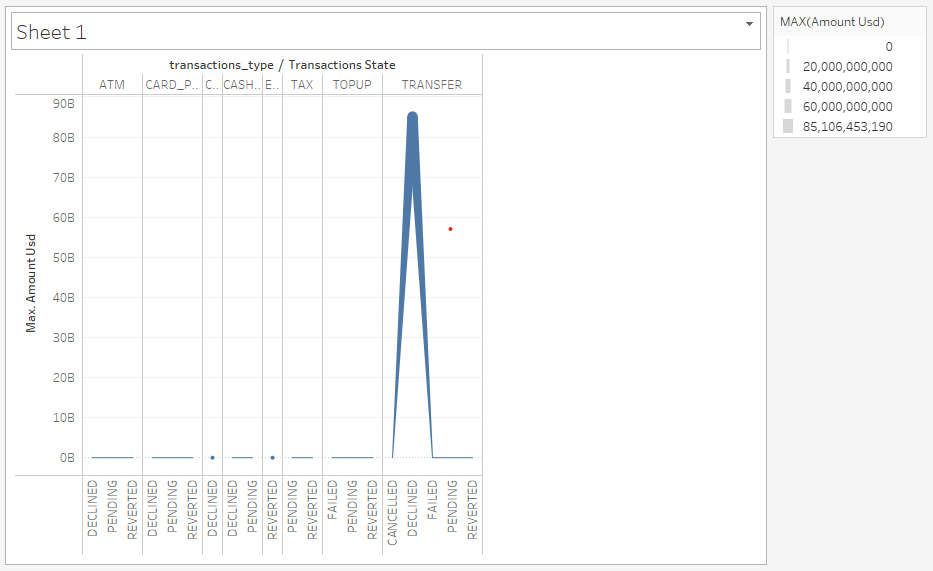

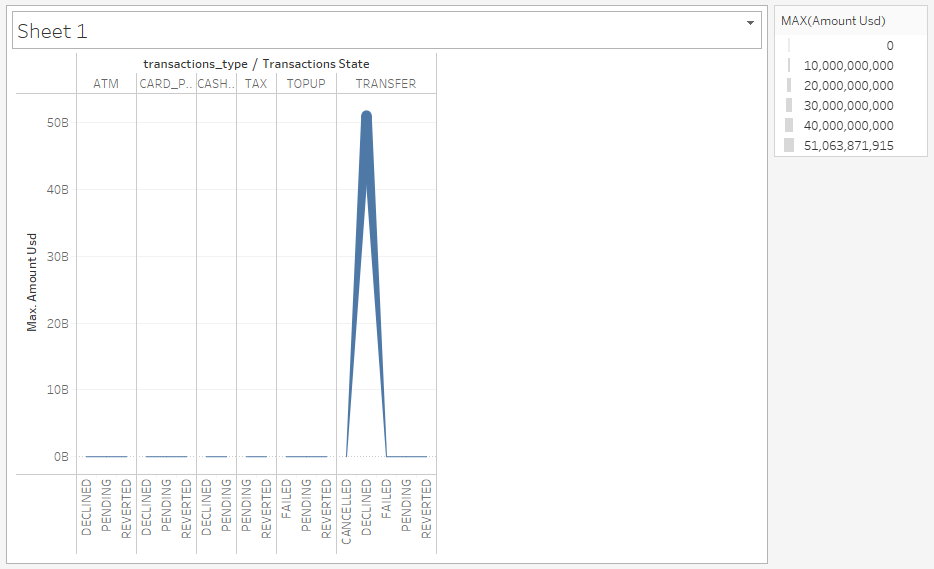



4. How does the count of new joiners and the total number of transactions 
by the new joiners vary across time (day-level)? (Hint: Use user_created_date to identify new joiners)

In [ ]:
mmd_df_tmp=mmd_df[['user_id','user_created_date']]
#print(mmd_df_tmp.isnull().sum())
u_id=mmd_df_tmp['user_id'].unique()
print(u_id)
#print(mmd_df_tmp.shape)
tmd_df_tmp=tmd_df[['user_id','transaction_id']]
tmd_df_tmp=pd.DataFrame(tmd_df_tmp.groupby('user_id')['transaction_id'].sum())
tmd_df_tmp.reset_index(inplace = True)
tmd_df_tmp = tmd_df_tmp[tmd_df_tmp['user_id'].isin(u_id)]
#print(tmd_df_tmp.isnull().sum())
#print(tmd_df_tmp)
tdd_df_tmp = tdd_df[['user_id','created_date']]
tdd_df_tmp = tdd_df_tmp[tdd_df_tmp['user_id'].isin(u_id)]
#print(tdd_df_tmp.isnull().sum())
db4=tdd_df_tmp.merge(tmd_df_tmp, on='user_id', how='left')
print(db4.isnull().sum())
print(db4.shape)
db4_1=db4.iloc[:1048576,:]
print(db4_1.shape)
db4_rem=db4.iloc[1048576:,:]
db4_2=db4_rem.iloc[:1048576,:]
db4_3=db4.iloc[2097152:,:]
print(db4_3.shape)

['c_0' 'c_1' 'c_10' ... 'c_9997' 'c_9998' 'c_9999']
user_id           0
created_date      0
transaction_id    0
dtype: int64
(2740040, 3)
(1048576, 3)
(642888, 3)


In [ ]:
file_db4_1=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db4_1.xlsx')
db4_1.to_excel(file_db4_1)

In [ ]:
file_db4_2=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db4_2.xlsx')
db4_2.to_excel(file_db4_2)

In [ ]:
file_db4_3=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db4_3.xlsx')
db4_3.to_excel(file_db4_3)

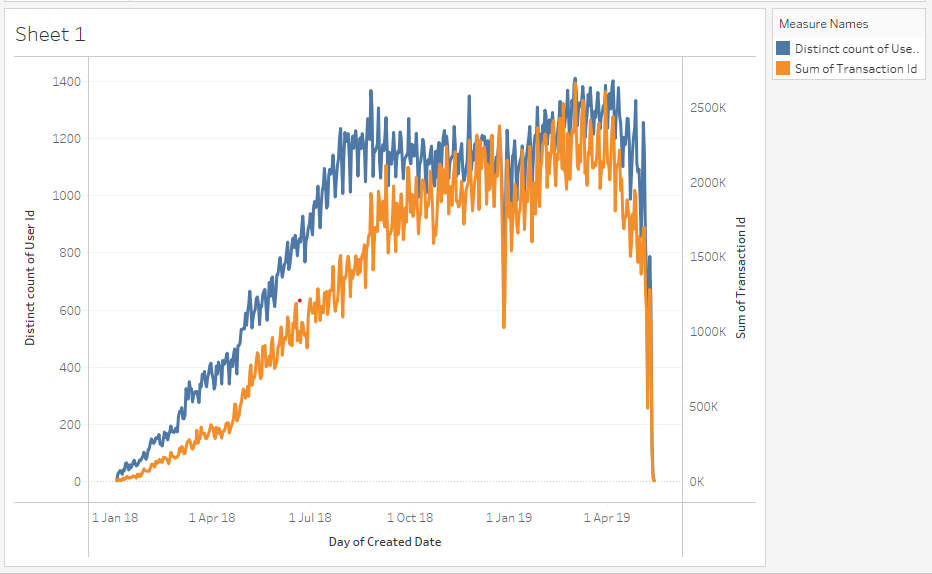

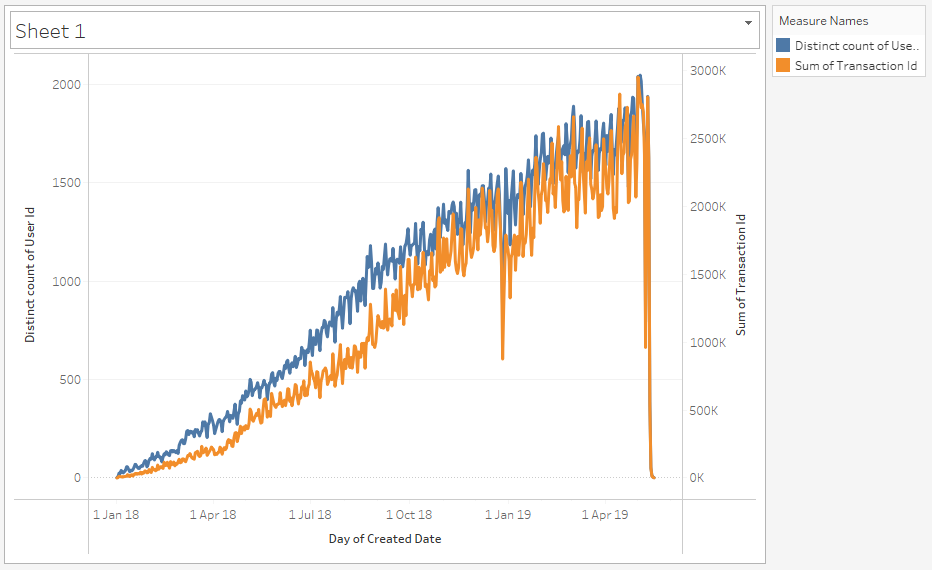

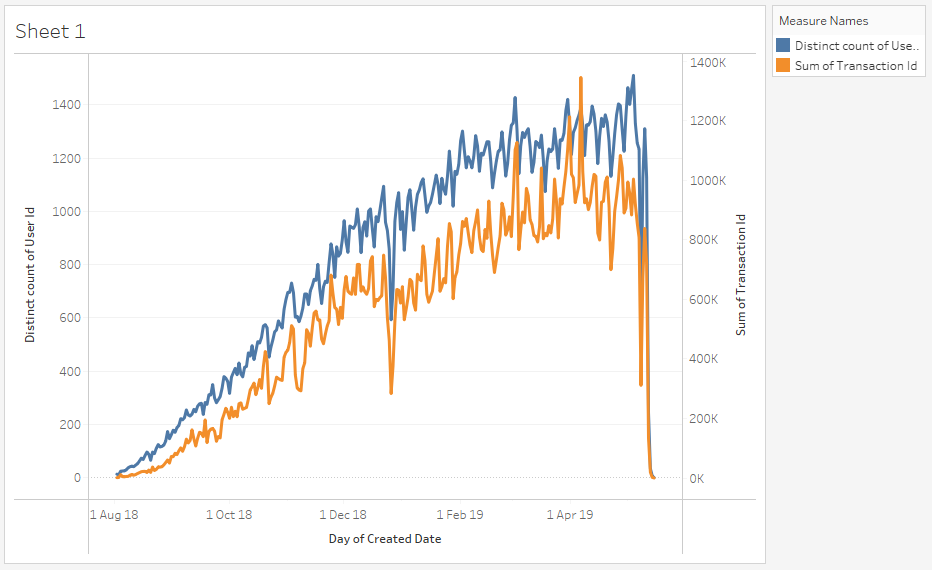



5. What does the overall distribution of distinct users across different countries look like on the world map?

In [ ]:
db5 = mmd_df[['user_id','city','country']]
print(db5.shape)
db5=db5.drop_duplicates()
print(db5.shape)

(143316, 3)
(19370, 3)


In [ ]:
file_db5=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db5.xlsx')
db5.to_excel(file_db5)

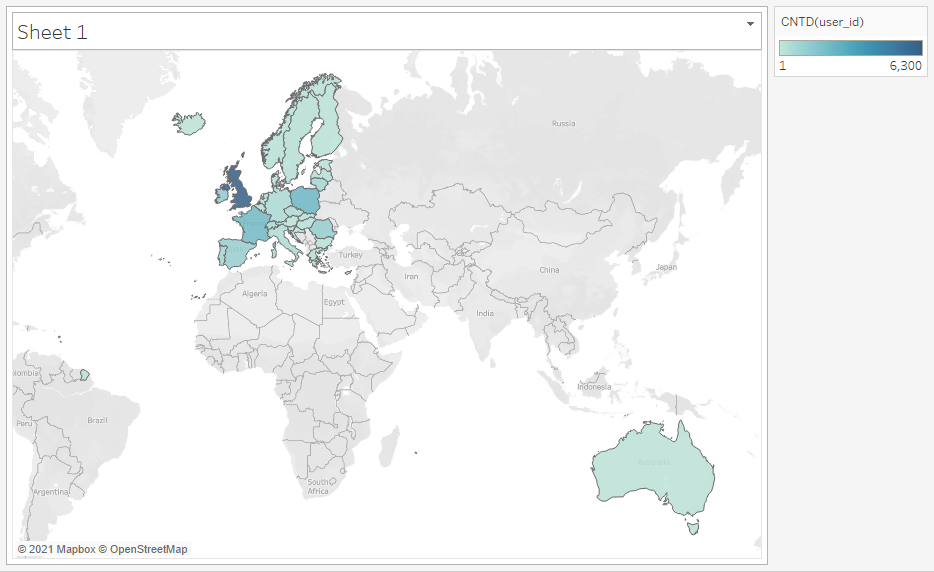



6. What does the average birth_year of users across different countries look like on the world map?

In [ ]:
db6 = mmd_df[['birth_year','city','country']]
print(db6.shape)
db5=db6.drop_duplicates()
print(db6.shape)

(143316, 3)
(143316, 3)


In [ ]:
file_db6=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db6.xlsx')
db6.to_excel(file_db6)

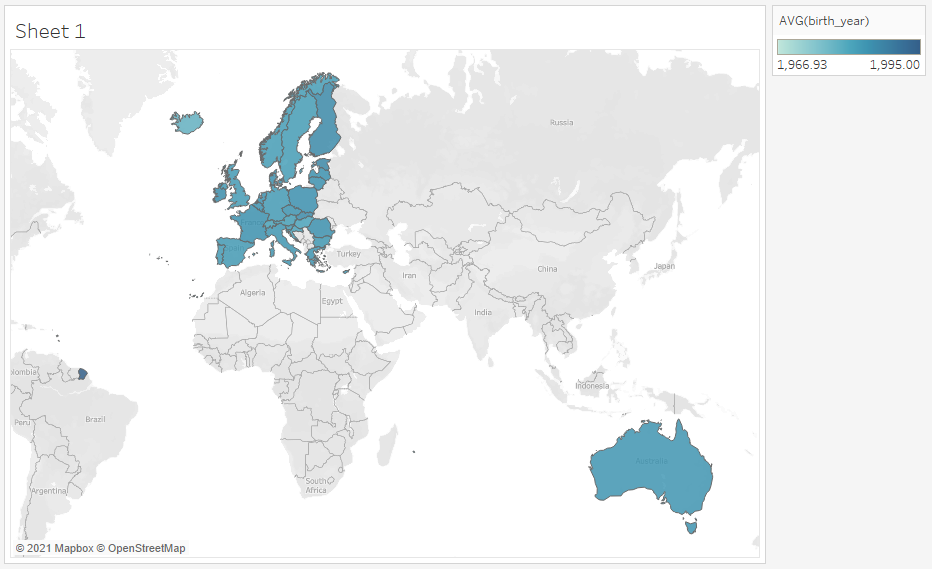 



7. Which plan_type is most popular among the users?

In [ ]:
db7 = mmd_df[['user_id','plan_type_1','plan_type_2','plan_type_3','plan_type_4','plan_type_5','plan_type_6']]
print(db7.shape)

(143316, 7)


In [ ]:
file_db7=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db7.xlsx')
db7.to_excel(file_db7)

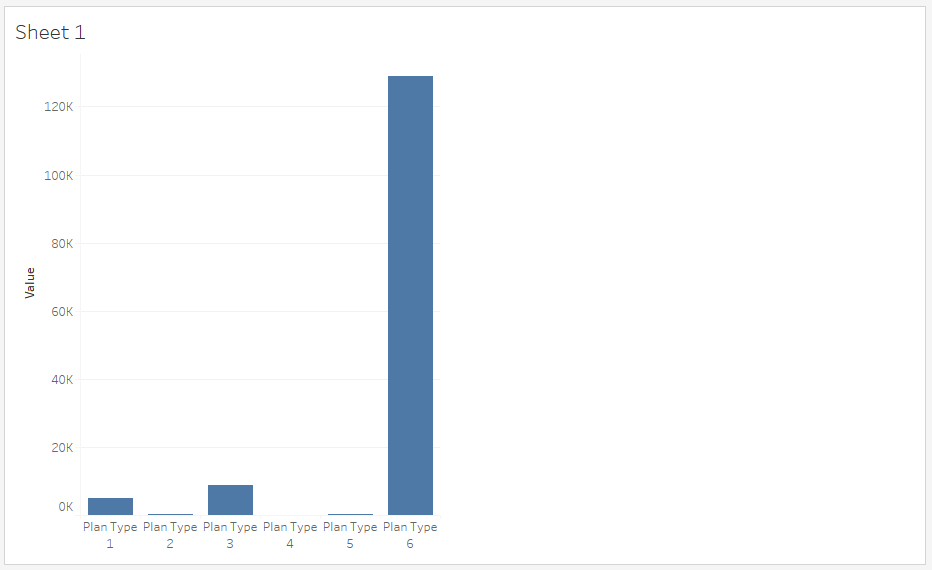



8. How does the average distribution of each plan_type vary across yearmonth?

In [ ]:
db8 = mmd_df[['yearmonth','plan_type_1','plan_type_2','plan_type_3','plan_type_4','plan_type_5','plan_type_6']]
print(db8.shape)
print(db8['yearmonth'].nunique())

(143316, 7)
17


In [ ]:
file_db8=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db8.xlsx')
db8.to_excel(file_db8)

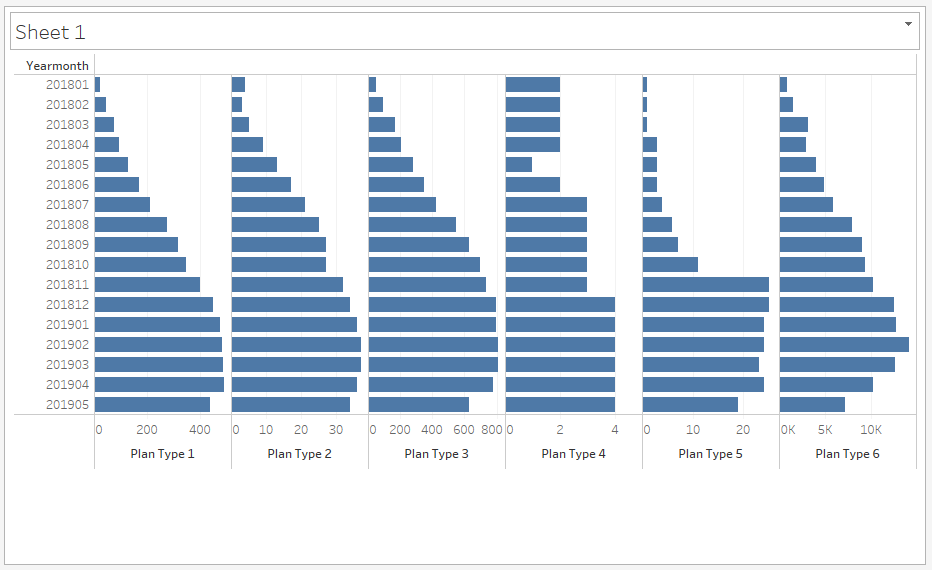



9. What is the total number of SENT and FAILED notifications across yearmonth?

In [ ]:
db9 = mmd_df[['yearmonth','status_sent','status_failed']]
print(db9.shape)
print(db9.isnull().sum())
print(db9.shape)
print(db9['status_failed'].unique())

(143316, 3)
yearmonth        0
status_sent      0
status_failed    0
dtype: int64
(143316, 3)
[ 0  2  1  3  4  5  7  8 17  6 11 12  9 34 21 18 20 23 31 10 15 13 14 27
 19 26 36 28 16 24 25 22 41 29 42 54 30 47]


In [ ]:
file_db9=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db9.xlsx')
db9.to_excel(file_db9)

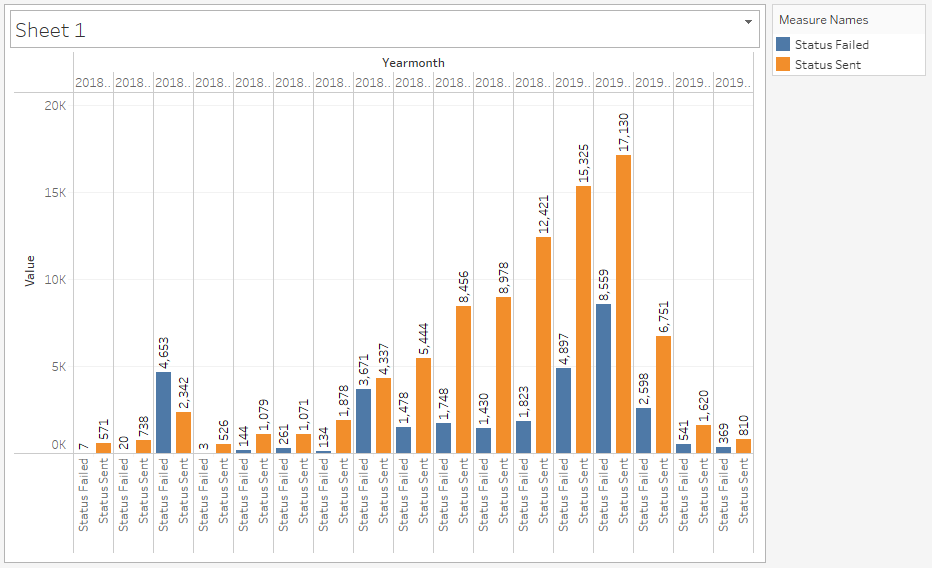



10.What does the box-plot distribution of amount_usd and tx_count across yearmonth tell us about the outliers?

In [ ]:
db10=tmd_df[['user_id','yearmonth','amount_usd','tx_count']]
print(db10.shape)
print(db10.isnull().sum())
db10=db10.dropna(subset=['amount_usd'])
print(db10.shape)

(143316, 4)
user_id           0
yearmonth         0
amount_usd    22794
tx_count          0
dtype: int64
(120522, 4)


In [ ]:
file_db10=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db10.xlsx')
db10.to_excel(file_db10)

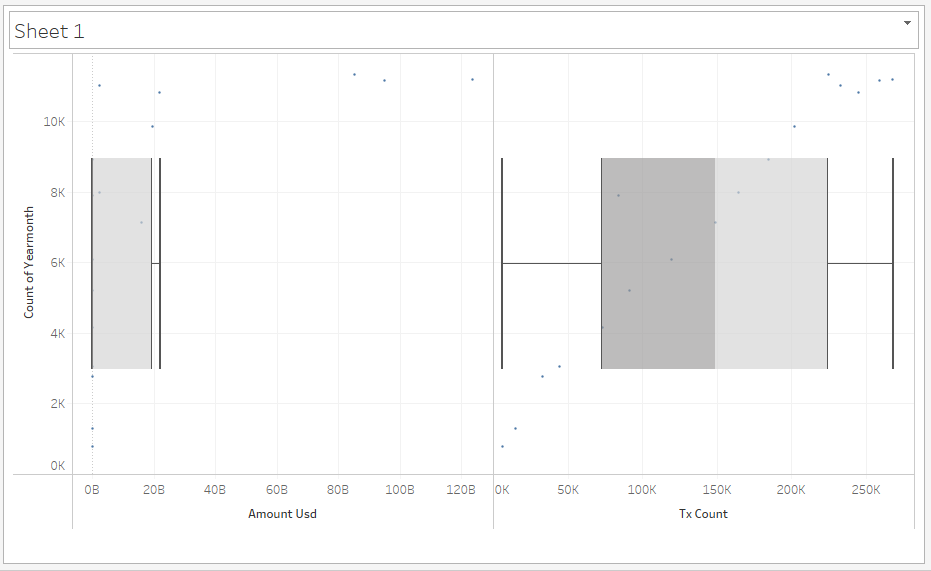



11.What inferences can be drawn based on average distributions of each transaction direction and transactions_type across ‘yearmonth’s?

In [ ]:
db11=tmd_df[['yearmonth','direction_outbound','direction_inbound','transactions_type_transfer','transactions_type_card_payment','transactions_type_exchange','transactions_type_atm','transactions_type_topup','transactions_type_card_refund','transactions_type_refund','transactions_type_fee','transactions_type_cashback','transactions_type_tax']]
print(db11.shape)
print(db11.isnull().sum())

(143316, 13)
yearmonth                         0
direction_outbound                0
direction_inbound                 0
transactions_type_transfer        0
transactions_type_card_payment    0
transactions_type_exchange        0
transactions_type_atm             0
transactions_type_topup           0
transactions_type_card_refund     0
transactions_type_refund          0
transactions_type_fee             0
transactions_type_cashback        0
transactions_type_tax             0
dtype: int64


In [ ]:
file_db11=('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/Part1/db11.xlsx')
db11.to_excel(file_db11)

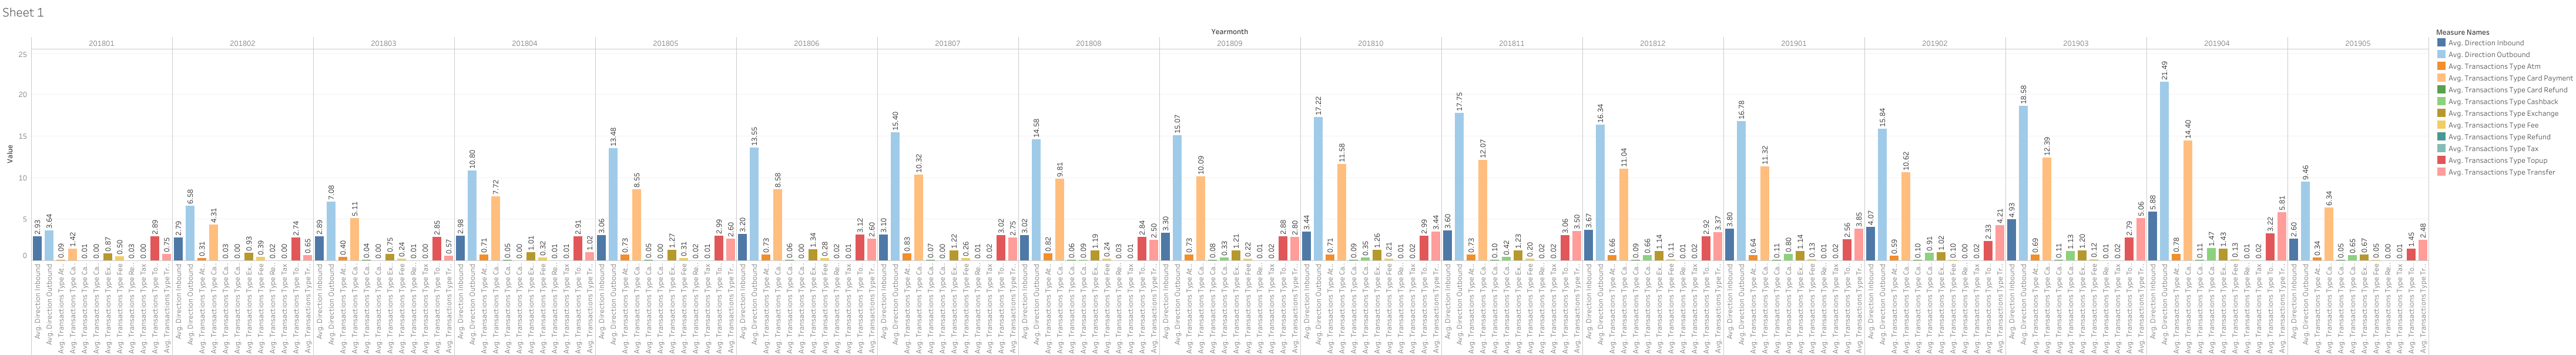



***Sub-tasks - Part B - [Data Quality Report using Jupyter Notebook | Python3]***
1. Use pandas-profiling package to auto-create summary reports within the notebook frame, for each of the three datasets

In [ ]:
mmd_profile=ProfileReport(mmd_df)
mmd_profile.to_file('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/marketing_monthly_PR.html')


Summarize dataset:   0%|          | 0/55 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4814: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
tdd_profile=ProfileReport(tdd_df.sample(n=35000))
tdd_profile.to_file('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/transaction_details_PR.html')

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
tmd_profile=ProfileReport(tmd_df.sample(n=20000))
tmd_profile.to_file('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/transaction_monthly_PR.html')

Summarize dataset:   0%|          | 0/78 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]